# Tarea. Clase 06

## Generación de variables aleatorias

---

$\mathbf{Ejemplo}$ (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad 
$$\frac{1}{\pi}\frac{1}{1+x^{2}}.$$

Ejercicio: 
- Corroborar que la función así definida es una función de densidad de probabilidad
- Encontrar F_X
- Crear una gráfica en Python que muestre su forma
- Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$
$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import cauchy
from IPython.display import Markdown, display

In [2]:
def printmd(text):
    display(Markdown(text))

### 1. Verificación de función de densidad

$\int_{-\infty}^{\infty} \frac{1}{\pi(1 + x^2)} dx = $1.0000

### 2. Obtención de $F_X(x)$ por integración

Dado que:  $$ f_X(x) = \frac{1}{\pi(1 + x^2)} $$

Entonces:  $$ F_X(x) = \int_{-\infty}^{x} \frac{1}{\pi(1 + t^2)}\, dt = \frac{1}{\pi} \arctan(x) + \frac{1}{2} $$

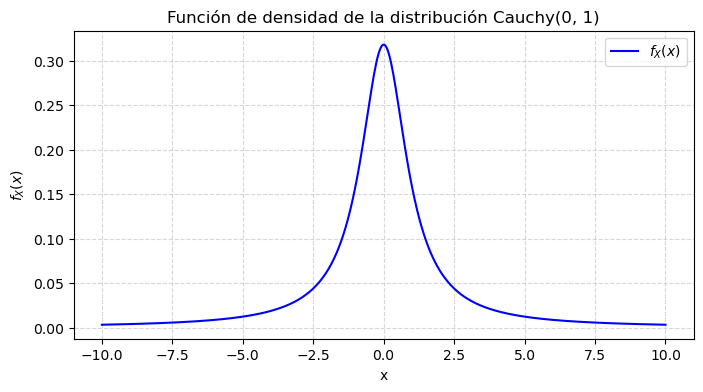

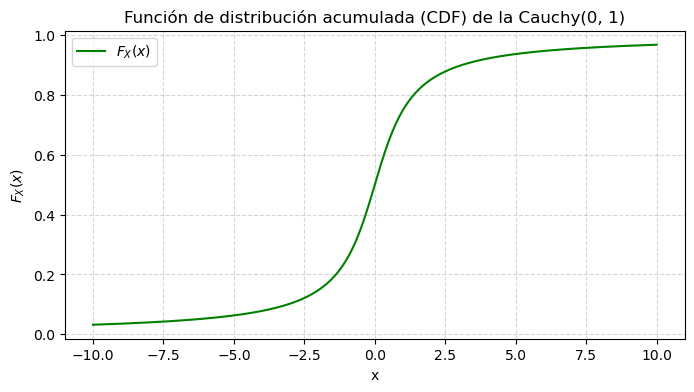

### 3. Generación de variable aleatoria Cauchy a partir de una uniforme

$X = \tan\left(\pi \left( U - \frac{1}{2} \right) \right)$ con $U \sim \mathcal{U}(0,1)$

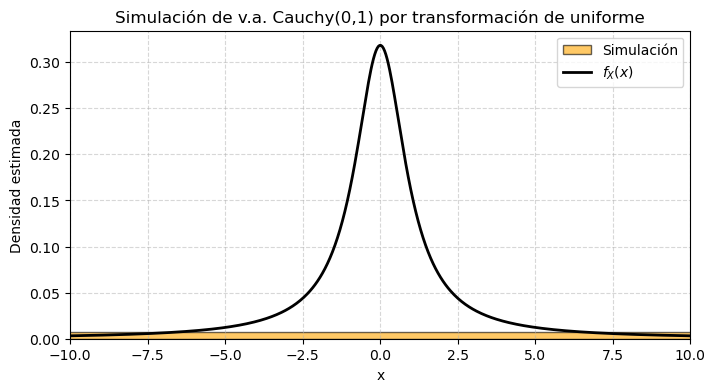

In [3]:
# 1. Verificar que es función de densidad
f = lambda x: 1 / (np.pi * (1 + x**2))
integral_total, _ = quad(f, -np.inf, np.inf)

printmd("### 1. Verificación de función de densidad")
printmd(r"$\int_{-\infty}^{\infty} \frac{1}{\pi(1 + x^2)} dx = $" + f"{integral_total:.4f}")

# 2. Calcular F_X(x) para varios valores
x, t = sp.symbols('x t')

f_t = 1 / (sp.pi * (1 + t**2))

# Integrar desde -∞ hasta x para obtener F_X(x)
F_X_expr = sp.integrate(f_t, (t, -sp.oo, x))
F_X_expr_simplificada = sp.simplify(F_X_expr)

printmd("### 2. Obtención de $F_X(x)$ por integración")
printmd(r"Dado que:  $$ f_X(x) = \frac{1}{\pi(1 + x^2)} $$")
printmd(r"Entonces:  $$ F_X(x) = \int_{-\infty}^{x} \frac{1}{\pi(1 + t^2)}\, dt = \frac{1}{\pi} \arctan(x) + \frac{1}{2} $$")

F_x = lambda x: (1 / np.pi) * np.arctan(x) + 0.5

x_vals = np.linspace(-10, 10, 500)
f_vals = f(x_vals)
F_vals = F_x(x_vals)

# 3. Gráficas PDF y CDF
plt.figure(figsize=(8, 4))
plt.plot(x_vals, f_vals, label=r"$f_X(x)$", color='blue')
plt.title("Función de densidad de la distribución Cauchy(0, 1)")
plt.xlabel("x")
plt.ylabel(r"$f_X(x)$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_vals, F_vals, label=r"$F_X(x)$", color='green')
plt.title("Función de distribución acumulada (CDF) de la Cauchy(0, 1)")
plt.xlabel("x")
plt.ylabel(r"$F_X(x)$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# 4. Simulación por transformación de variable uniforme
u = np.random.uniform(0, 1, 10000)
x_sim = np.tan(np.pi * (u - 0.5))

printmd("### 3. Generación de variable aleatoria Cauchy a partir de una uniforme")
printmd(r"$X = \tan\left(\pi \left( U - \frac{1}{2} \right) \right)$ con $U \sim \mathcal{U}(0,1)$")

# Histograma de la simulación
plt.figure(figsize=(8, 4))
plt.hist(x_sim, bins=200, density=True, alpha=0.6, color='orange', edgecolor='black', label="Simulación")
plt.plot(x_vals, f_vals, color='black', linewidth=2, label=r"$f_X(x)$")
plt.xlim(-10, 10)
plt.title("Simulación de v.a. Cauchy(0,1) por transformación de uniforme")
plt.xlabel("x")
plt.ylabel("Densidad estimada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()